## Imports and stuff

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#gauss distribution
def carl_friedrich(x,a,mu,sig):
    return a * np.exp(-(x - mu)**2/(2*sig**2))

In [3]:
params = {
      'text.latex.preamble': r"\usepackage{mlmodern}",
      'legend.fontsize': 9,
      'axes.labelsize': 9,
      'axes.titlesize': 11,
      'xtick.labelsize' :9,
      'ytick.labelsize' : 9,
      #'mathtext.fontset': 'cm',
      #'mathtext.rm': 'stixsans',
      'font.family' : 'mlmodern', 
      #'font.family' : 'sans-serif',
      'text.usetex' : True,
      }
plt.rcParams.update(params)



## Get data:

In [4]:
data = np.loadtxt("data.csv", skiprows=1, delimiter=",") #load dataset

selected_bins = [11,12,13,14,15,16,17] #bins from dataset to select for gaussian sampling
bins = len(selected_bins) #number of selected bins
samples = 100000 #no. of samples taken

hpp_samples, hAA_samples, ratios = [],[],[]

dataSelected = np.take(data, selected_bins, axis=0) #select bins given by indexes from array selected_bins from data

for row in dataSelected:  #iterates over data. Data in format: [index | hpp | hpp_error | hAA | hAA_error] 
    
    hAA = np.random.normal(row[3], row[4], samples) #randomly samples gaussian distribution with parameters gicen by data
    hpp = np.random.normal(row[1], row[2], samples)

    hpp_samples.append(hpp)
    hAA_samples.append(hAA)
    ratios.append(hAA/hpp)

#_, hpp_mu, hpp_sig, hAA_mu, hAA_sig = dataSelected.T

## Fit:

In [5]:
sigmaL, sigmaR, paramsL, paramsR, limits, xrange = [],[],[],[], [], []

for hist in ratios:
    
    vals, edges = np.histogram(hist,bins=50) #histogram from individual measurement values
    centers = (edges[1:] + edges[:-1]) / 2 #calculation of center of bins
    limit = np.argmax(vals) #index of bin with the maximum value

    limits.append(limit)
    xrange.append(centers)

    popt, _ = curve_fit(carl_friedrich, centers[:limit+1], vals[:limit+1]) #left fit of the histogram using carl
    sigmaL.append(popt[2])
    paramsL.append(popt)
    
    popt, _ = curve_fit(carl_friedrich, centers[limit:], vals[limit:]) #right fit of the histogram using carl
    sigmaR.append(popt[2])
    paramsR.append(popt)

## Plot:

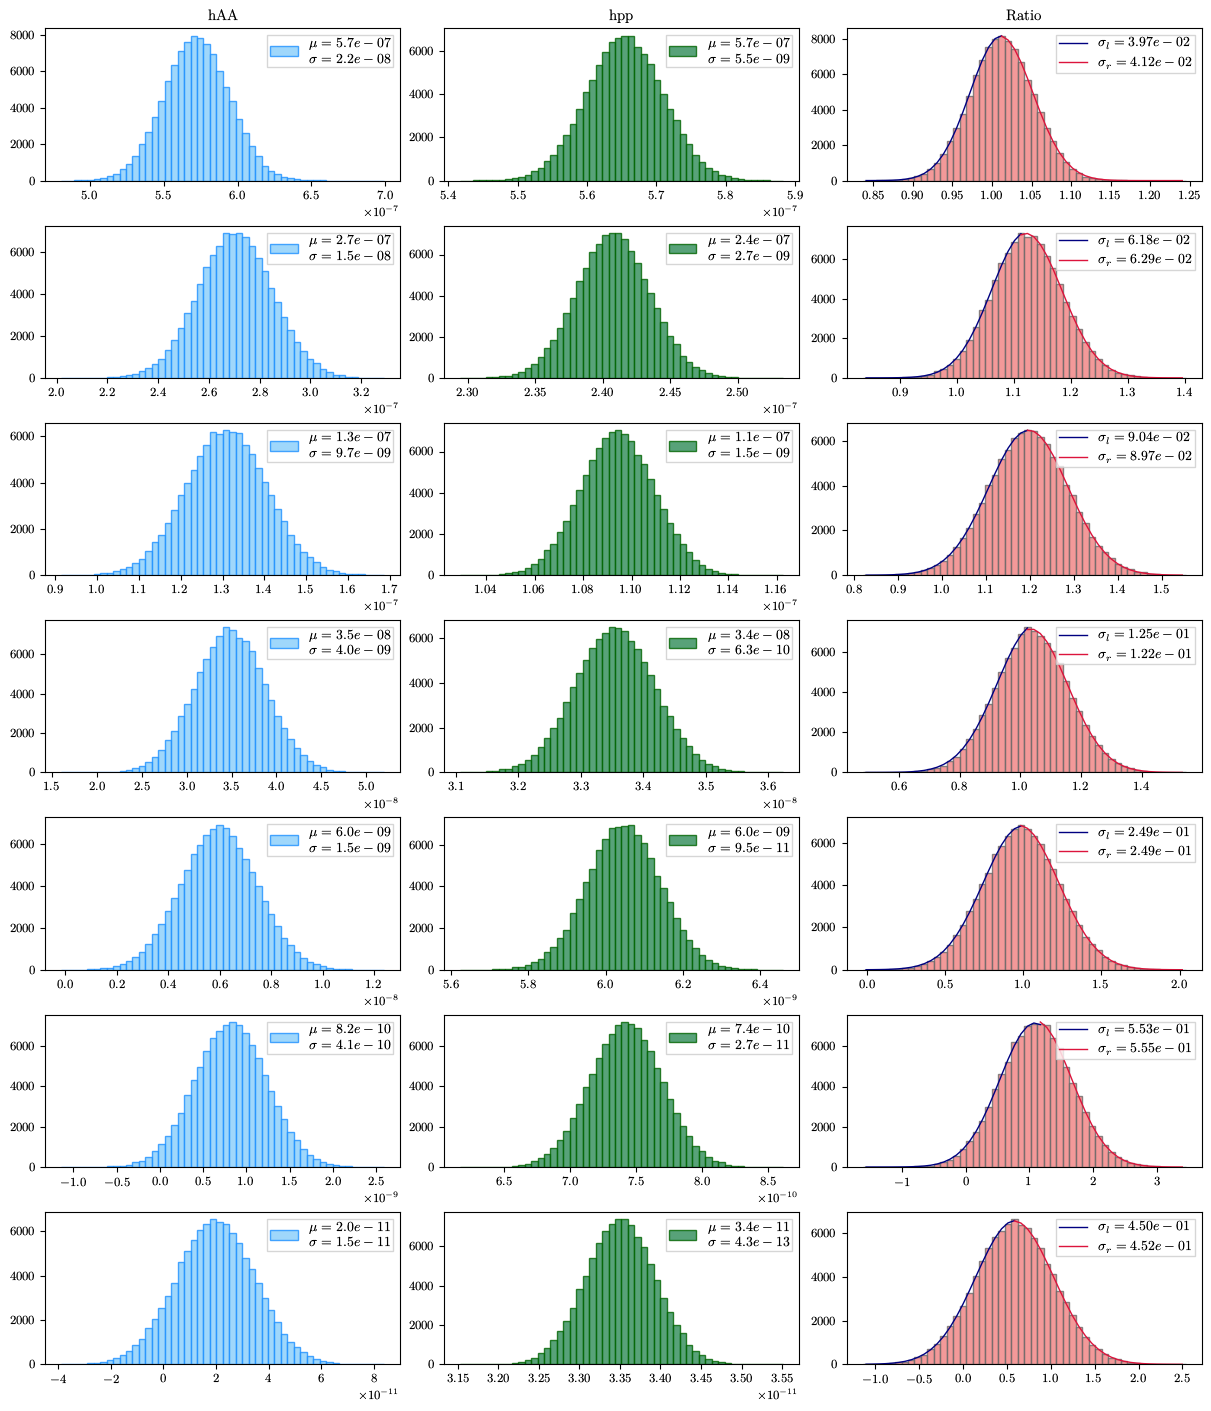

In [12]:
fig, axs = plt.subplots(bins, 3, layout="constrained", figsize=(12, 2*bins))
#fig.subplots_adjust(hspace=0, vspace=0) #graphs without spacing

for (col1, col2, col3), hAA, hpp, ratio, legend, pL, pR, x, limit in zip(axs, hAA_samples, hpp_samples, ratios, dataSelected, paramsL, paramsR, xrange, limits): #iteration through all of the data needed for plotting
    
    col1.hist(hAA, bins = 50, color='lightskyblue', ec='dodgerblue', alpha=.8, label = '$\mu = {:.1e}$ \n $\sigma = {:.1e}$'.format(legend[3],legend[4])) #col1 corresponds to hAA
    col2.hist(hpp, bins = 50, color='seagreen', ec='darkgreen', alpha=.8, label = '$\mu = {:.1e}$ \n $\sigma = {:.1e}$'.format(legend[1],legend[2])) #col2 corresponds to hpp
    col3.hist(ratio, bins = 50, color='lightcoral', ec='dimgrey', alpha=.8) #col3 corresponds to Ratios

    col3.plot(x[:limit+1], carl_friedrich(x[:limit+1],*pL),c='navy', lw=1, label = '$\sigma_l = {:.2e}$'.format(np.abs(pL[2]))) #plot of the left fit
    col3.plot(x[limit:], carl_friedrich(x[limit:],*pR), c='crimson', lw=1, label = '$\sigma_r = {:.2e}$'.format(np.abs(pR[2]))) #plot of the right fit   
    
    col1.legend(loc="upper right", fontsize=10, fancybox=False, borderpad=.2)
    col2.legend(loc="upper right", fontsize=10, fancybox=False, borderpad=.2)
    col3.legend(loc="upper right", fontsize=10, fancybox=False, borderpad=.2)
    

axs[0,0].set_title("hAA")
axs[0,1].set_title("hpp")
axs[0,2].set_title("Ratio")

plt.savefig('output/hw1.pdf')
plt.show()